In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

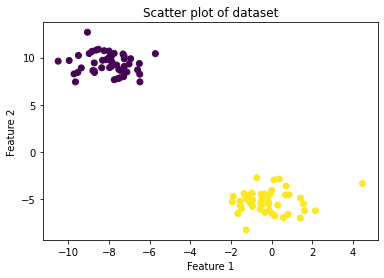

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=55)

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of dataset")
plt.show()

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
print("X_train:" )
print(X_train)
print("X_test: ")
print(X_test)
print("y_train: ")
print(y_train)
print("y_test: ")
print(y_test)

X_train:
[[ -8.96238982  10.43453868]
 [ -8.14012413   9.77473358]
 [ -8.61570698  10.80191697]
 [ -7.2392451    9.87859576]
 [ -7.86219952   9.57491664]
 [ -1.25571135  -8.26595393]
 [ -7.87788159   9.05203202]
 [-10.48808013   9.62643048]
 [  1.41013177  -6.99793263]
 [ -1.9372475   -5.28950709]
 [ -6.9268783    9.88630873]
 [ -1.48396393  -6.00289789]
 [ -9.35225323   8.91130696]
 [ -7.61119461   9.20792318]
 [ -9.0479324   12.69152733]
 [ -8.34843971   8.92621499]
 [ -1.2985699   -4.62448788]
 [ -8.71450598   8.58482733]
 [ -0.38605494  -4.682886  ]
 [ -0.96144368  -4.37784582]
 [  1.56799647  -5.51092253]
 [ -0.56351888  -6.06553803]
 [  0.85670426  -4.54913986]
 [ -7.4016938    8.61154785]
 [ -7.94069606  10.15987446]
 [ -1.54616697  -5.67144169]
 [ -7.11160555   8.48028585]
 [  0.58080831  -6.9701134 ]
 [ -8.70539582   8.42842819]
 [ -1.01361403  -5.145112  ]
 [ -8.30730016   9.72109824]
 [ -0.72830041  -2.73400035]
 [ -0.34352359  -4.45474847]
 [ -8.50592881  10.88389781]
 [ -8

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    xy = np.column_stack([xx.ravel(), yy.ravel()])

    Z = clf.decision_function(xy).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision function and data points")
    plt.show()

In [ ]:
plot_decision_function(X_train, y_train, X_test, y_test,clf)

ValueError: ignored

In [ ]:
# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
clf_predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1])

In [ ]:
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))

Accuracy: 93.85964912280701%


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

ValueError: ignored

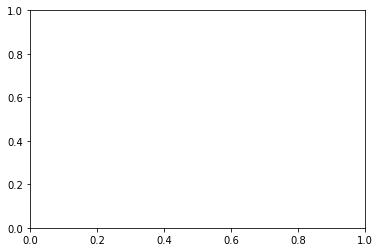

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# Part B : Breast Cancer Prediction Example

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# Print the names of the 13 features
print("Features: ", cancer.feature_names)

# Print the label type of cancer ('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# Print the shape of the feature data
print("Shape of feature data: ", cancer.data.shape)


Shape of feature data:  (569, 30)


In [ ]:
# Print the cancer labels (0:malignant, 1:benign)
print("Cancer labels: ", cancer.target)

Cancer labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

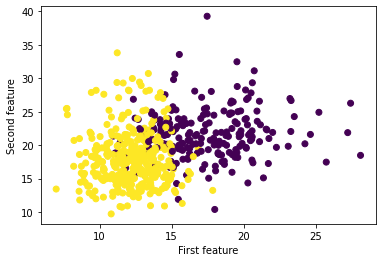

In [ ]:
# Plotting scatters
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer.target)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# Create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9385964912280702


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9178082191780822
Recall: 0.9852941176470589
